AMAÇ = İNSANA AİT YÜZ İMGELERİ İLE DUYGU TESPİTİ.

YÖNTEM = KONVOLÜSYON KATMANLAI İLE DERİN ÖĞRENME MODELİ.

VERİSETİ =  https://www.kaggle.com/msambare/fer2013 

ARAÇ = TENSORFLOW KERAS API'SİNDEN YARARLANARAK DNN MODELİ OLUŞTURULACAKTIR.

In [1]:
import tensorflow as tf
import keras
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('fer2013.csv')
print(data.shape)  
print(data.head())

(35887, 3)
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


EĞİTİM  VE TEST VERİ KÜMESİNİN ÖN İŞLEME ADIMLARI.

In [7]:
train_data = data[data.Usage == 'Training']
train_pixels = list(train_data.pixels.str.split(" "))


In [10]:
train_images = np.array(train_pixels,dtype=int)


In [ ]:
train_images = train_images.astype(np.float)

Görüntüyü 48x48 piksel boyutunda görselleştirmek için fonksiyon

In [13]:
def show_image(image):
    show_image = image.reshape(48,48)
    plt.axis('off')
    plt.imshow(show_image,cmap='gray')

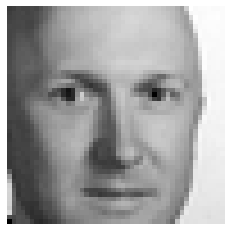

In [16]:
show_image(train_images[33])

In [53]:
train_labels = train_data["emotion"].values
class_count = np.unique(train_labels).shape[0]

y_train = train_labels

In [ ]:
np.unique(data["Usage"].values)

test_data = data[data.Usage == "PublicTest"]
test_pixels = list(test_data.pixels.str.split(" "))

test_images = np.array(test_pixels,dtype=int)
test_images = test_images.astype(np.float)

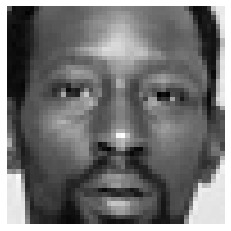

In [49]:
show_image(test_images[33])

MODEL MİMARİSİNİN KERAS APİ İLE KURULUM ADIMLARI

In [50]:
model = Sequential()

# 1.KATMAN

model.add(Conv2D(64,kernel_size = (3,3),input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2.KATMAN

model.add(Conv2D(64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))
model.add(Dropout(0.6))

#3.KATMAN

model.add(Conv2D(32,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4.KATMAN

model.add(Conv2D(32,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5.KATMAN

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))
model.add(Dropout(0.6))

#FULLY CONNECTED KATMANI

model.add(Flatten())  # Matris vektör formunu almıştır.
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

#ÇIKIŞ KATMAN

model.add(Dense(7)) # 7 ADET SINIFIMIZ OLDUĞU İÇİN DENSE SAYISINI 7 SEÇİYORUZ.
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer ='adam' ,metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0

In [51]:
x_train = train_images.reshape(-1,48,48,1)
x_test = test_images.reshape(-1,48,48,1)

print('EĞİTİM :',x_train.shape)
print('TEST :',x_test.shape)


EĞİTİM : (28709, 48, 48, 1)
TEST : (3589, 48, 48, 1)


In [58]:
EPOCH = 3
BATCH_SIZE = 32

history = model.fit(x_train, y_train, epochs= EPOCH , batch_size = BATCH_SIZE ,validation_split =0.1 ,verbose=1)

model.save('emotion_detection.h5')

Epoch 1/3
808/808 [==============================] - 390s 482ms/step - loss: 1.5324 - accuracy: 0.4041 - val_loss: 1.3880 - val_accuracy: 0.4720
Epoch 2/3
808/808 [==============================] - 393s 486ms/step - loss: 1.4483 - accuracy: 0.4395 - val_loss: 1.3698 - val_accuracy: 0.4758
Epoch 3/3
808/808 [==============================] - 387s 479ms/step - loss: 1.3959 - accuracy: 0.4592 - val_loss: 1.2583 - val_accuracy: 0.5165


MODELİN PERFORMANS METRİKLERİ VE EĞİTİM GRAFİĞİNİ

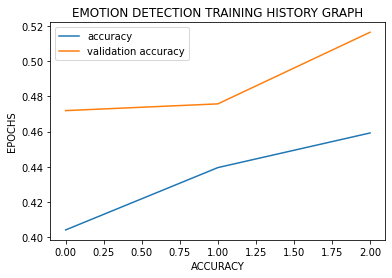

In [111]:
plt.title('EMOTION DETECTION TRAINING HISTORY GRAPH')
plt.xlabel('ACCURACY')
plt.ylabel('EPOCHS')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label ='validation accuracy')
plt.legend()


EĞİTTİĞİMİZ MODELİN TEST EDİLMESİ.

In [109]:
import cv2

image_path = 'testimage1.jpg'

test_image_original = cv2.imread(image_path)

test_image = cv2.resize(test_image_original,(48,48))
test_image = cv2.cvtColor(test_image , cv2.COLOR_BGR2GRAY)

test_data =np.reshape(test_data,(1,48,48,1))
results = model.predict(test_data , batch_size=1)

result_inds = np.argmax(results)

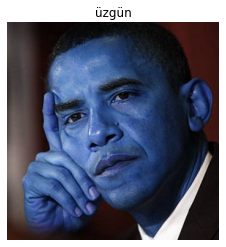

In [110]:
class_names = ['kizgin','igrenme','korku','mutlu','üzgün','sasirma','dogal']

predict = class_names[result_inds]

plt.imshow(test_image_original)
plt.title(predict)
plt.axis('off')
plt.show()